<a href="https://colab.research.google.com/github/danisotoguerrero/Clasificador-de-canciones/blob/main/Laboratorio_2_Grupo_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificador de canciones de Spotify**

In [2]:
# Importamos las bibliotecas que sabemos que vamos a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [3]:
# Para leer datos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Path de la carpeta donde tenemos los datos
folder = "/content/drive/MyDrive/UNI/Big Data/"

In [6]:
# 1. Carga de datos
df = pd.read_csv(folder + "Canciones_Spotify.csv")
df.sample(5)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
1264,1264,0.850000,0.227,247020,0.309,0.000000,0,0.0898,-7.368,1,0.0292,167.097,4.0,0.225,0,Prove Me Wrong,Mandisa
1685,1685,0.000028,0.351,165047,0.915,0.072500,1,0.0972,-4.530,0,0.0881,184.815,4.0,0.457,0,Serpents,Neck Deep
1480,1480,0.006470,0.695,182693,0.818,0.000005,5,0.0219,-5.379,0,0.0334,119.965,4.0,0.923,0,Hard Times,Paramore
1481,1481,0.000640,0.375,176387,0.930,0.000000,2,0.3180,-2.631,1,0.0561,147.124,4.0,0.500,0,Kiwi,Harry Styles
562,562,0.000690,0.759,398615,0.764,0.719000,10,0.1160,-7.416,0,0.0446,117.996,4.0,0.315,1,This Time Around,Softwar


In [34]:
# 2. Cambio de estructura de datos a numpy y transformación de las etiquetas a números
from sklearn import preprocessing

X = df[['danceability', 'energy']].values   # Obtengo el alto y ancho del sepalo
y_labels = df['tempo'].values                    # Obtengo las etiquetas

le = preprocessing.LabelEncoder()     # Instancio un objeto de la clase LabelEncoder()
y = le.fit_transform(y_labels)        # Transformo las etiquetas a números

In [35]:
# partición de los datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be plac

<Axes: xlabel='energy', ylabel='danceability'>

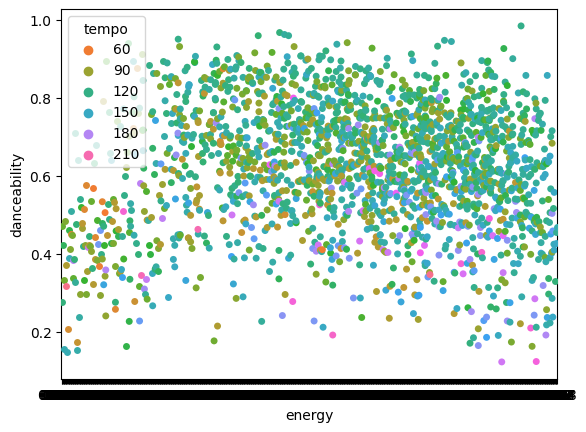

In [37]:
#3. Visualización de datos
sns.swarmplot(x="energy", y="danceability", hue="tempo", data = df, palette="husl")

In [38]:
# 4. Creación del modelo y ajuste (entrenamiento)
# Creamos un objeto de la clase LogisticRegression pasandole una serie de parámetros
logreg = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=50)

# Entrenamos el modelo siendo la 'X' el tamaño del sepalo e 'y' el tipo de flor
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=50, multi_class='ovr', solver='liblinear')

In [52]:
# 5. Obtención del modelo
b0 = logreg.intercept_
b = logreg.coef_

print("\nIris-setosa: Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width"
      .format(b0=b0[0], b1=b[0,0], b2=b[0,1]))

print("\nIris-versicolor: Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width"
      .format(b0=b0[1], b1=b[1,0], b2=b[1,1]))

print("\nIris-virginica: Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width"
      .format(b0=b0[2], b1=b[2,0], b2=b[2,1]))


Iris-setosa: Z = -3.34 + -2.03 · sepal_length + -2.26 · sepal_width

Iris-versicolor: Z = -3.51 + -2.05 · sepal_length + -1.86 · sepal_width

Iris-virginica: Z = -3.43 + -1.85 · sepal_length + -2.24 · sepal_width


In [53]:
# 6. Visualización de los resultados
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicción de cada uno de los puntos de la malla
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

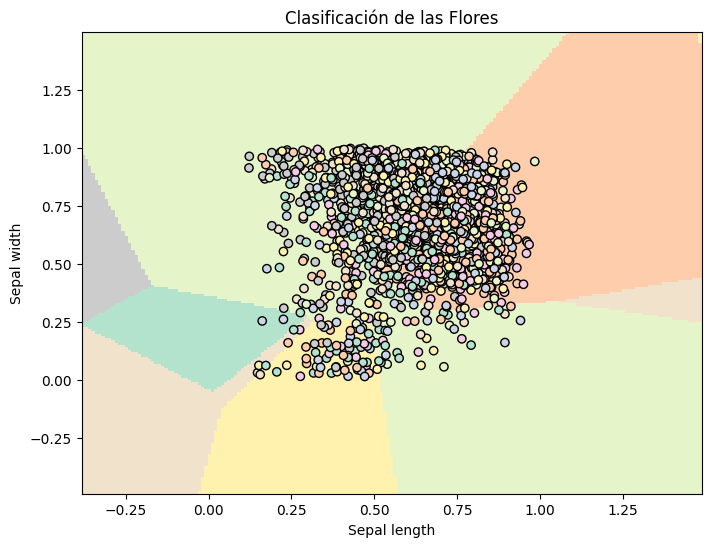

In [54]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))

# Dibujamos la malla con los diferentes colores
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)


# Dibujamos los puntos (flores) del dataset
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Pastel2)

plt.title('Clasificación de las Flores')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [56]:
# Cálculo de Predicción
X_flor = X_test[1]
y_flor = y_test[1]

print('Flor: X={} - y={} - Clase = {}'.format(X_flor, y_flor, le.inverse_transform([y_flor])))

Flor: X=[0.547 0.643] - y=1543 - Clase = [143.064]


In [57]:
prediccion = logreg.predict([X_flor])
probabilidades = logreg.decision_function([X_flor])

print('Predicción -> Pertenece a la clase {}'.format(prediccion))
print('Predicción Etiquetada -> Pertenece a la clase {}'.format(le.inverse_transform(prediccion)))
print('Probabilidad de pertenencia a cada clase: ' + \
      '\n\tIris-Setosa: {:0.2f}\n\tIris-Versicolor: {:0.2f}\n\tIris-Virginica: {:0.2f}' \
     .format(probabilidades[0,0], probabilidades[0,1], probabilidades[0,2]))

Predicción -> Pertenece a la clase [1036]
Predicción Etiquetada -> Pertenece a la clase [123.966]
Probabilidad de pertenencia a cada clase: 
	Iris-Setosa: -5.91
	Iris-Versicolor: -5.83
	Iris-Virginica: -5.89


# Modelos de Machine Learning:

## KNN (K-Nearest Neighbors)

## SVM (Support Vector Machines)

In [58]:
# Máquina de vectores de soporte (SVM)
from sklearn.svm import SVC

svc = SVC(kernel='linear') # Clasificador
svc.fit(X_train, y_train) # Entrenar
svc.predict(X_test) # Predecir
svc.score(X_test,y_test) # Evaluar

0.0

## Árbol de decisión

In [55]:
# Árbol de decisiones
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier # Clasificador
dtc.fit(X_train, y_train) # Entrenar
dtc.predict(X_test) # Predecir
dtc.score(X_test,y_test) # Evaluar

TypeError: ignored

## Bayes (Naive Bayes)

In [23]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()# Clasificador
gnb.fit(X_train, y_train) # Entrenar
gnb.predict(X_test) # Predecir
gnb.score(X_test,y_test) # Evaluar

0.6089108910891089

## Otro modelo que crean conveniente

In [22]:
# K-means (El vecino mas cercano)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7) # Clasificador (n_neighbors = número de vecinos)
knn.fit(X_train, y_train) # Entrenar
knn.predict(X_test) # Predecir
knn.score(X_test,y_test) # Evaluar

0.5816831683168316

In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() # Clasificador
svc.fit(X_train, y_train) # Entrenar
svc.predict(X_test) # Predecir
svc.score(X_test,y_test) # Evaluar

0.6089108910891089

# Realizar algún tipo de validación:





## Validación Simple

## Validación Cruzada k-fold



# Evaluación y análisis del rendimiento de cada modelo:

## Matriz de confusión

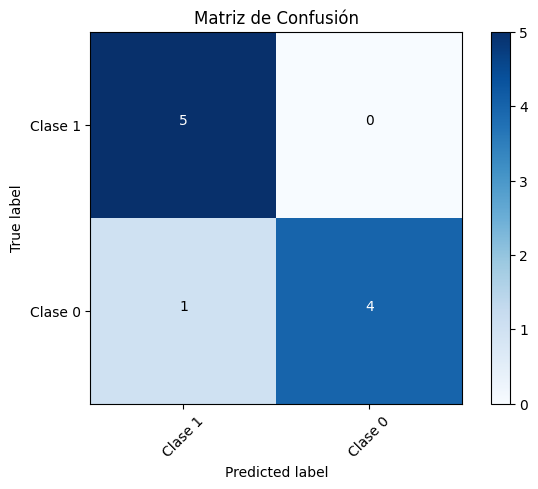

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
matriz_confusion = confusion_matrix(y_true=y_real, y_pred=y_predict, labels=[1, 0])
plot_confusion_matrix(matriz_confusion, classes=['Clase 1', 'Clase 0'], title='Matriz de Confusión')
plt.show()

## Precision

* Basandonos en el ejemplo, calculamos la precision como:

$$Precision = \frac{TP}{TP + FP} = \frac{4}{4 + 2} = \frac{4}{6} = 0.67$$

In [47]:
from sklearn.metrics import precision_score

precision_score(y_true=y_real, y_pred=y_predict, average='macro')

0.9166666666666667

## Recall

* Basandonos en el ejemplo, calculamos el recall como:

$$Recall = \frac{TP}{TP + FN} = \frac{4}{4 + 1} = \frac{4}{5} = 0.8$$

In [48]:
from sklearn.metrics import recall_score

recall_score(y_true=y_real, y_pred=y_predict, average='macro')

0.9

## F1

* Basandonos en el ejemplo, calculamos el F1 como:

$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} = 2 \cdot \frac{0.67 \cdot 0.8}{0.67 + 0.8} = 2 \cdot \frac{0.54}{1.47} = 0.73$$

In [49]:
from sklearn.metrics import f1_score

f1_score(y_true=y_real, y_pred=y_predict, average='macro')

0.898989898989899

### Clasificación Múltiple

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_real, y_pred=y_predict))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



# Ajustar para cada uno de los modelos los hiper parámetros:

## Grid Search

## Random Search

# Realizar un ensamble de los modelos:

## Votación Mayoritaria

# Evaluación y análisis del rendimiento:

## Matriz de confusión

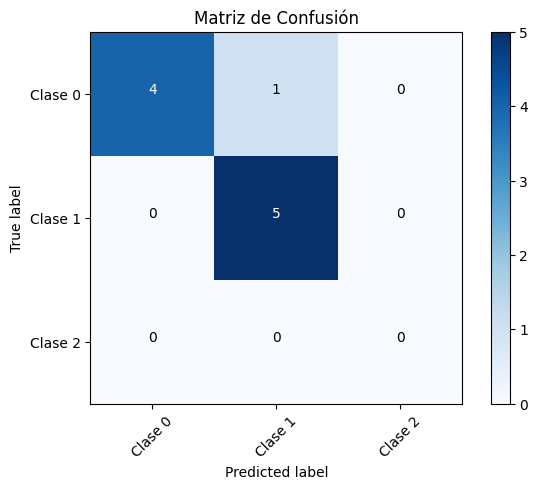

In [51]:
plt.figure()
matriz_confusion = confusion_matrix(y_true=y_real, y_pred=y_predict, labels=[0, 1, 2])
plot_confusion_matrix(matriz_confusion, classes=['Clase 0', 'Clase 1', 'Clase 2'], title='Matriz de Confusión')
plt.show()

## Precisión, recall y F1-score

Grupo 8 : Cintia Cuevas, Daniela Soto, Nicolas Pelleritti